## lead categorization into high and low potential
#### Lead is basically an individaul who might be the customer (business opportunities)but currently isnt
#### Data exploration insights – Sales effectiveness.

## Business Case:
FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

## PROJECT GOAL: 
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

In [1]:
!pip install sqlalchemy 
!pip install pymysql
!pip install mysql-connector

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing the necessary libraries
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1) Connect the database

Database details:
DB Name: project_sales
Table Name: data
Host: 18.136.157.135
Port: 3306
Username: dm_team2
Password: DM!$Team&27@9!20!

In [3]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user= 'dm_team2',
                                  password='DM!$Team&27@9!20!' )

In [4]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


## 2) Load the dataset

In [7]:
query = "select * from data" # SQL statement
data = pd.read_sql(query,connection)#what Query and where to execute
print(data.shape)
data.head()

(7422, 9)


Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open

In [8]:
data.to_csv('Sales.csv')

## 3) Domain Analysis

## 4) Basic Checks

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [10]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [11]:
data.describe()

Created Product_ID Source Mobile    EMAIL    Sales_Agent  \
count               7422       7422   7422   7422     7422           7422   
unique              6752         30     26    487      883             13   
top     26-09-2018 11:30         18   Call         #VALUE!  Sales-Agent-4   
freq                   4       1711   2547   1810     1701           1500   

               Location Delivery_Mode     Status  
count              7422          7422       7422  
unique               18             5         11  
top     Other Locations        Mode-5  Junk Lead  
freq               2500          2975       1536

In [12]:
data.shape

(7422, 9)

In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

## 5) Exploratory Data Analysis

## 6) Data Preprocessing

In [14]:
# Dropping the columns which are not nesessary for the data
data.drop(['Mobile'],axis=1,inplace=True)
data.drop(['EMAIL'],axis=1,inplace=True)
data.drop(['Created'],axis=1,inplace=True)
data.head()

Product_ID   Source     Sales_Agent Location Delivery_Mode Status
0             Website  Sales-Agent-11                 Mode-5   Open
1             Website  Sales-Agent-10                 Mode-5   Open
2             Website  Sales-Agent-10                 Mode-5   Open
3             Website  Sales-Agent-10                 Mode-5   Open
4             Website  Sales-Agent-10                 Mode-5   Open

In [15]:
data.shape

(7422, 6)

In [16]:
## Analysing products
data.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [17]:
data.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [18]:
data.Product_ID.replace(['25','21','2','12','26','14','11','22','3','17','6','8','13','24','16','23','0','28','7','4'],
                        'less sell',inplace=True)

In [19]:
data.Product_ID.sort_values()

0                
2727             
2729             
4979             
2556             
          ...    
5796    less sell
5843    less sell
5849    less sell
5854    less sell
7421    less sell
Name: Product_ID, Length: 7422, dtype: object

In [20]:
data.Source.unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [21]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [22]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)

In [23]:
data.Source.replace('By Recommendation','Customer Referral',inplace=True)

In [24]:
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [25]:
data.Source.value_counts()

Live Chat            2677
Call                 2547
Website              1787
Customer Referral     212
Existing Customer     146
Campaign               36
                       17
Name: Source, dtype: int64

In [26]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [27]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [28]:
# Defining 'Status' as High Potential or Low Potential
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High_Potential',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low_Potential',inplace=True)

In [29]:
data.Status.value_counts()

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

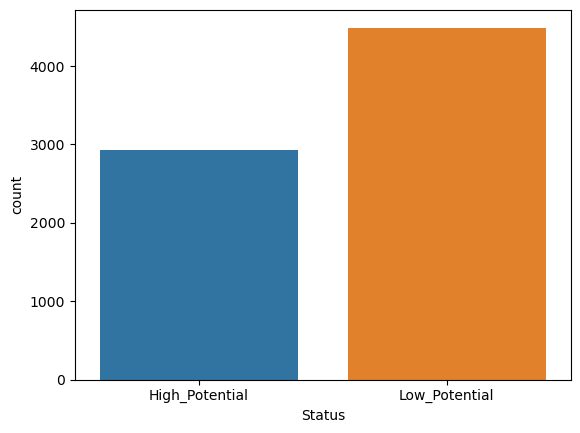

In [30]:
sns.countplot(x = "Status", data = data)
data.loc[:, 'Status'].value_counts()

In [31]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [32]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Non Native',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [33]:
data.Location.value_counts()

Other Locations    2614
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Non Native          214
Pune                142
                     58
Name: Location, dtype: int64

In [34]:
data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', '',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [35]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [36]:
pd.set_option("display.max_rows", None)

In [37]:
data

Product_ID             Source     Sales_Agent         Location  \
0                          Website  Sales-Agent-11                    
1                          Website  Sales-Agent-10                    
2                          Website  Sales-Agent-10                    
3                          Website  Sales-Agent-10                    
4                          Website  Sales-Agent-10                    
5                          Website  Sales-Agent-10                    
6                          Website  Sales-Agent-10                    
7                          Website  Sales-Agent-10                    
8                          Website  Sales-Agent-10                    
9                          Website  Sales-Agent-10                    
10                         Website  Sales-Agent-10                    
11                         Website  Sales-Agent-10                    
12                         Website  Sales-Agent-10                    
13                                  Sales-Agent-10                    
14                         Website  Sales-Agent-10                    
15                                  Sales-Agent-10                    
16                         Website  Sales-Agent-10                    
17                         Website  Sales-Agent-10                    
18            9          Live Chat   Sales-Agent-3        Bangalore   
19           19               Call   Sales-Agent-4  Other Locations   
20                         Website  Sales-Agent-10                    
21                                  Sales-Agent-10                    
22                         Website  Sales-Agent-10                    
23                            Call   Sales-Agent-9       Non Native   
24           18            Website  Sales-Agent-11  Other Locations   
25           15            Website   Sales-Agent-7        Hyderabad   
26           18               Call   Sales-Agent-7        Bangalore   
27           18          Live Chat   Sales-Agent-9  Other Locations   
28           27               Call  Sales-Agent-11          Chennai   
29           19          Live Chat   Sales-Agent-4       Non Native   
30           19          Live Chat   Sales-Agent-4       Non Native   
31           18               Call   Sales-Agent-7        Bangalore   
32           27          Live Chat  Sales-Agent-11        Hyderabad   
33            9  Customer Referral   Sales-Agent-7        Bangalore   
34            9               Call   Sales-Agent-4        Bangalore   
35            9            Website  Sales-Agent-11        Bangalore   
36           19            Website   Sales-Agent-7  Other Locations   
37           18          Live Chat   Sales-Agent-9        Bangalore   
38            5          Live Chat   Sales-Agent-7       Non Native   
39           19          Live Chat   Sales-Agent-4            Delhi   
40            9               Call   Sales-Agent-4          Chennai   
41            9          Live Chat  Sales-Agent-11       Non Native   
42           18               Call   Sales-Agent-9          Chennai   
43    less sell               Call   Sales-Agent-9  Other Locations   
44            9               Call  Sales-Agent-11        Bangalore   
45           15               Call  Sales-Agent-11  Other Locations   
46           15               Call   Sales-Agent-7  Other Locations   
47           19          Live Chat   Sales-Agent-4  Other Locations   
48           15               Call   Sales-Agent-7  Other Locations   
49    less sell               Call   Sales-Agent-4  Other Locations   
50           18               Call   Sales-Agent-4        Bangalore   
51           15               Call  Sales-Agent-11  Other Locations   
52            9               Call   Sales-Agent-4           Mumbai   
53           15               Call   Sales-Agent-7  Other Locations   
54            9               Call   Sales-Agent-9        Bangalore   
55           19              

<AxesSubplot:>

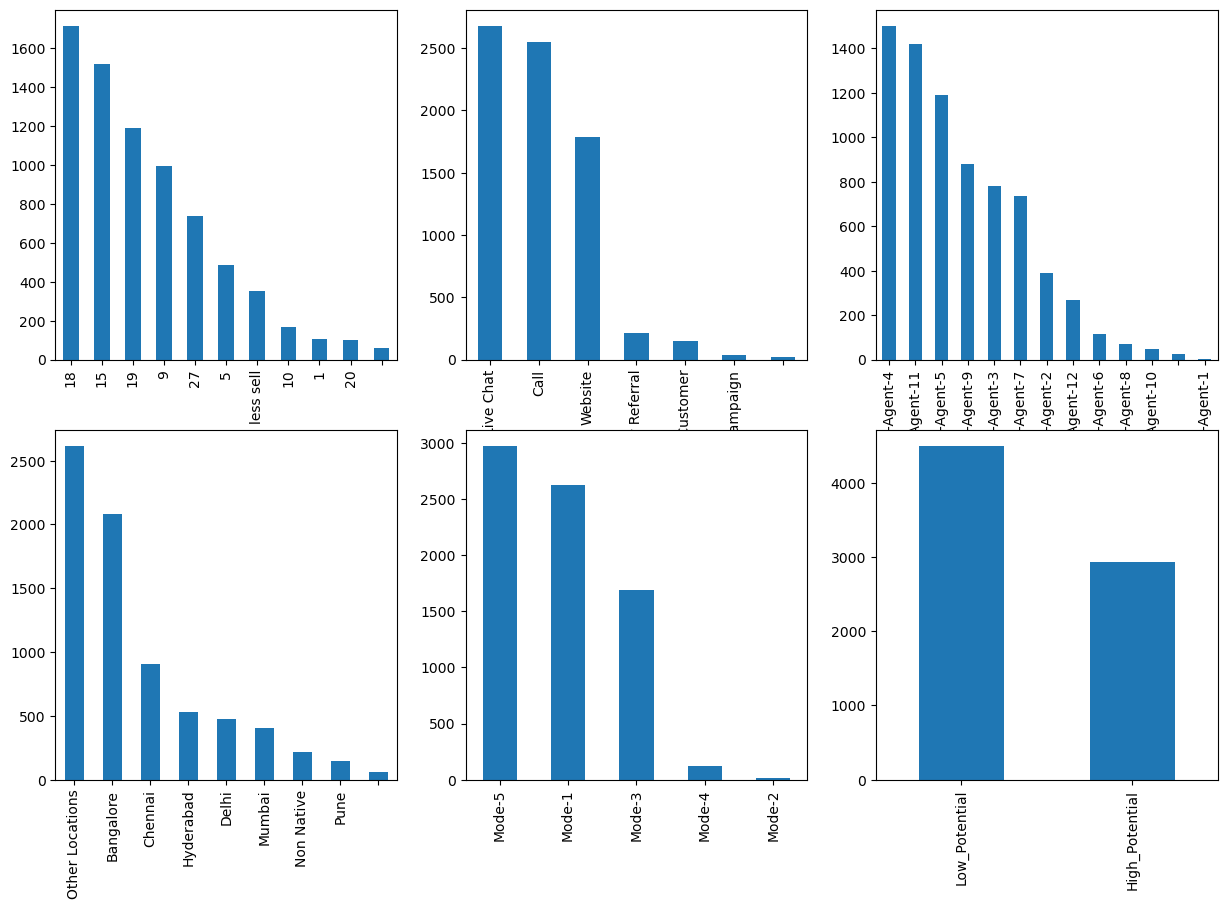

In [38]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')
plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')
plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')
plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')
plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

In [39]:
from sklearn.preprocessing import LabelEncoder

data1 = data.apply(LabelEncoder().fit_transform)

1    4491
0    2931
Name: Status, dtype: int64

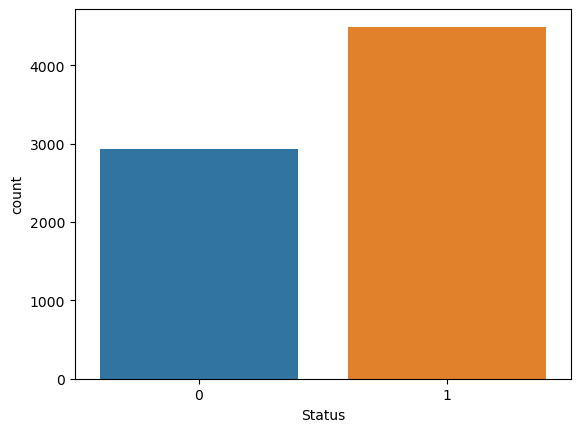

In [40]:
sns.countplot(x = "Status", data = data1)
data1.loc[:, 'Status'].value_counts()

In [41]:
data1

Product_ID  Source  Sales_Agent  Location  Delivery_Mode  Status
0              0       6            3         0              4       0
1              0       6            2         0              4       0
2              0       6            2         0              4       0
3              0       6            2         0              4       0
4              0       6            2         0              4       0
5              0       6            2         0              4       0
6              0       6            2         0              4       0
7              0       6            2         0              4       0
8              0       6            2         0              4       0
9              0       6            2         0              4       0
10             0       6            2         0              4       0
11             0       6            2         0              4       0
12             0       6            2         0              4       0
13             0       0            2         0              4       0
14             0       6            2         0              4       0
15             0       0            2         0              4       0
16             0       6            2         0              4       0
17             0       6            2         0              4       0
18             9       5            6         1              0       0
19             5       1            7         7              4       0
20             0       6            2         0              4       0
21             0       0            2         0              4       0
22             0       6            2         0              4       0
23             0       1           12         6              2       0
24             4       6            3         7              0       0
25             3       6           10         4              0       1
26             4       1           10         1              0       0
27             4       5           12         7              2       1
28             7       1            3         2              4       0
29             5       5            7         6              1       0
30             5       5            7         6              3       1
31             4       1           10         1              0       1
32             7       5            3         4              2       0
33             9       3           10         1              3       0
34             9       1            7         1              0       0
35             9       6            3         1              0       0
36             5       6           10         7              0       1
37             4       5           12         1              0       0
38             8       5           10         6              2       0
39             5       5            7         3              3       0
40             9       1            7         2              4       0
41             9       5            3         6              2       1
42             4       1           12         2              0       1
43            10       1           12         7              4       0
44             9       1            3         1              4       0
45             3       1            3         7              4       1
46             3       1           10         7              4       1
47             5       5            7         7              4       1
48             3       1           10         7              4       1
49            10       1            7         7              4       0
50             4       1            7         1              4       0
51             3       1            3         7              4       0
52             9       1            7         5              4       1
53             3       1           10         7              4       1
54             9       1           12         1              0       0
55             5       1      

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7422 non-null   int32
 1   Source         7422 non-null   int32
 2   Sales_Agent    7422 non-null   int32
 3   Location       7422 non-null   int32
 4   Delivery_Mode  7422 non-null   int32
 5   Status         7422 non-null   int32
dtypes: int32(6)
memory usage: 174.1 KB


## 7) Feature Selection

<AxesSubplot:>

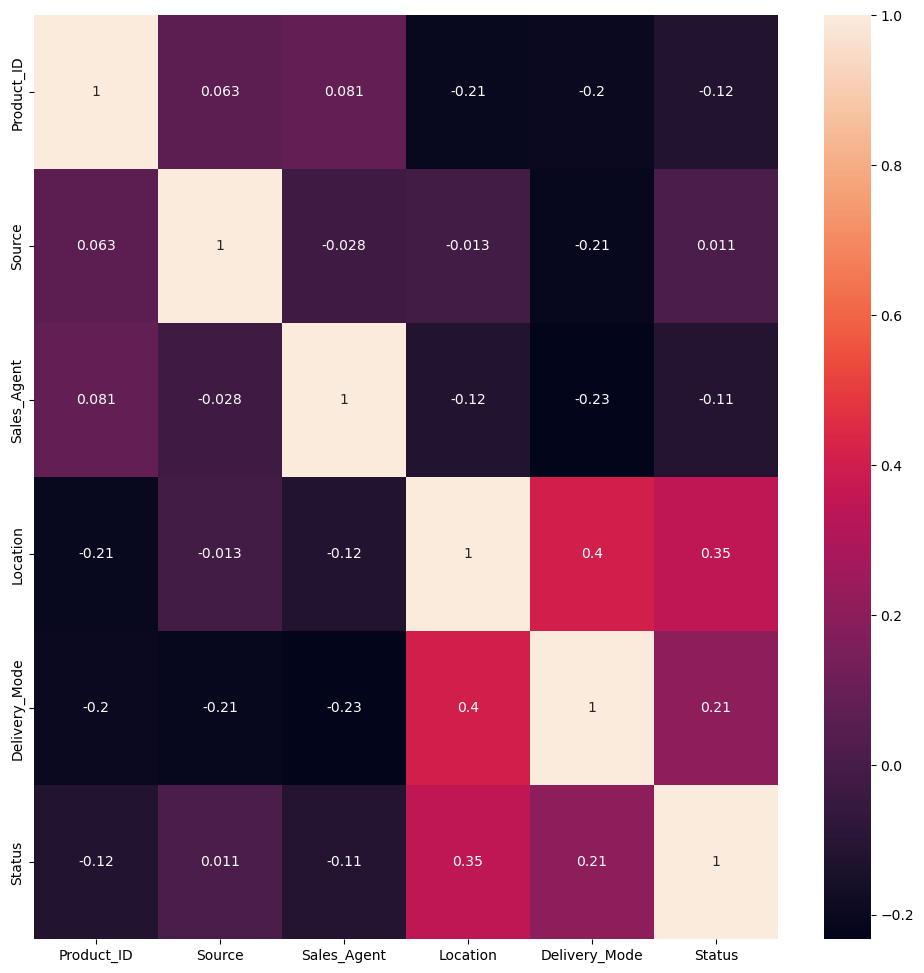

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(), annot=True)

## 8) Model Creation

In [44]:
from sklearn.model_selection import train_test_split
X= data1.drop('Status', axis=1)
y= data1['Status']

In [45]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

In [46]:
X_train.shape

(5566, 5)

In [47]:
X_test.shape

(1856, 5)

In [48]:
y_train.shape

(5566,)

In [49]:
y_test.shape

(1856,)

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [51]:
# SMOTE for sampling technique
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [52]:
X_train.shape

(6736, 5)

In [53]:
X_test.shape

(1856, 5)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [55]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.6487068965517241
RandomForsetClassifier
0.6745689655172413
DecisionTreeClassifier
0.6681034482758621
KNeighborsClassifier
0.6707974137931034
XGBClassifier
0.6928879310344828


<AxesSubplot:>

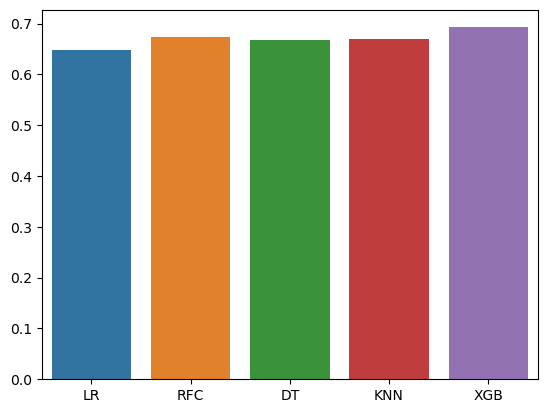

In [56]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       733
           1       0.77      0.69      0.73      1123

    accuracy                           0.69      1856
   macro avg       0.69      0.69      0.69      1856
weighted avg       0.70      0.69      0.70      1856



In [59]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=12, objective=binary:logistic, subsample=0.6;, score=0.715 total time=   1.0s
[CV 2/3] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=12, objective=binary:logistic, subsample=0.6;, score=0.703 total time=   1.0s
[CV 3/3] END colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=12, objective=binary:logistic, subsample=0.6;, score=0.735 total time=   1.1s
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=12, objective=binary:logistic, subsample=1.0;, score=0.718 total time=   0.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=12, objective=binary:logistic, subsample=1.0;, score=0.712 total time=   0.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=12, objective=binary:logistic, subsample=1.0;, score=0.746 total time=   0.9s
[CV 1/3] END colsample

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [60]:
grid.best_score_

0.725357428301142

In [61]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=12, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6988146551724138
[[515 218]
 [341 782]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       733
           1       0.78      0.70      0.74      1123

    accuracy                           0.70      1856
   macro avg       0.69      0.70      0.69      1856
weighted avg       0.71      0.70      0.70      1856



In [63]:
predictions= y_pred

<AxesSubplot:ylabel='count'>

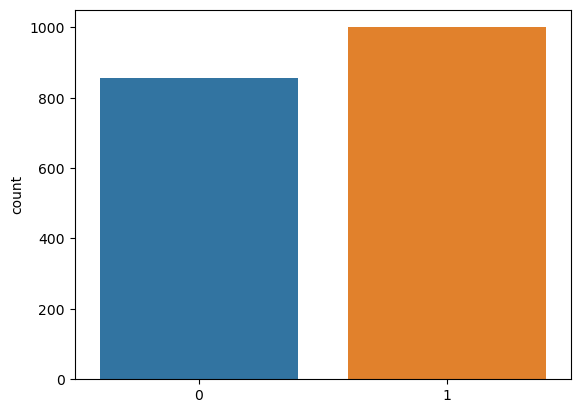

In [64]:
sns.countplot(predictions)

In [65]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6,7,8,9],
              'min_child_weight': [1,5,10,12,14,16,18,20],
              'subsample': [0.6,0.8,1.0,1.2,1.4,1.6,1.8],
              'colsample_bytree': [0.6,0.8,1.0,1.4,1.6,1.8], 'gamma': [0.5,1,1.5,2,2.5,3,3.5]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=5, verbose=3,param_distributions= params, n_iter=10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=1.0, gamma=3.5, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.6;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, gamma=3.5, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.6;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, gamma=3.5, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.6;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, gamma=3.5, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.6;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, gamma=3.5, max_depth=4, min_child_weight=5, objective=binary:logistic, subsample=1.6;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=1.8, gamma=1.5, max_depth=9, min_child_weight=10, objective=binary:logistic, subsample=1.2;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=1.

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [66]:
grid.best_score_

0.7298118249368307

In [67]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
y_pred1= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.6955818965517241
[[513 220]
 [345 778]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.64       733
           1       0.78      0.69      0.73      1123

    accuracy                           0.70      1856
   macro avg       0.69      0.70      0.69      1856
weighted avg       0.71      0.70      0.70      1856



In [69]:
predictions1= y_pred1

<AxesSubplot:ylabel='count'>

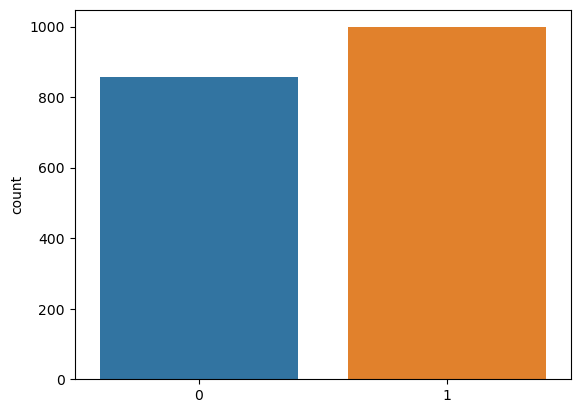

In [70]:
sns.countplot(predictions1)

#### XGBoost Classifier gave an accuracy of 72%.

The project is completed with the purpose of finding out the lead quality. The company's motive is to invest in the right prospects. We divided the Lead as 'High Potential=0 , Low Potential=1' . The result in increasing of accuracy drastically change when XGBoost Classifier is used.